In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
census_df = pd.read_csv(url, names=columns, sep=',\s+')

In [14]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
census_df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


The dataset contains no null values. However, there are a few '?' values, in "workclass","occupation", "native-country", that can be fixed.

In [16]:
census_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
attrib, counts = np.unique(census_df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['workclass'][census_df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(census_df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['occupation'][census_df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(census_df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
census_df['native-country'][census_df['native-country'] == '?'] = most_freq_attrib 

In [18]:
census_df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<AxesSubplot:xlabel='count', ylabel='income'>

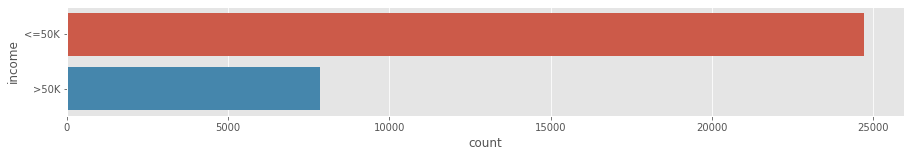

In [19]:
plt.figure(figsize=(15,2))
plt.style.use('ggplot')
sns.countplot(y="income", data=census_df)

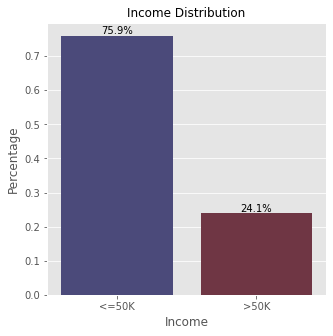

In [20]:
plt.figure(figsize=(5,5))
plt.title('Income Distribution', fontsize=12)
income_perc = census_df['income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

perc = sns.barplot(x = 'Income', y = 'Percentage', data = income_perc.head(2), palette='icefire')
for p in perc.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    perc.annotate(f'{height:.1%}', (x + width/2, y + height*1.01), ha='center')

In [21]:
income_perc

,Income,Percentage
0,<=50K,0.75919
1,>50K,0.24081


In [22]:
def AgeGroup(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "70+"

census_df['AgeGroup'] = census_df['age'].apply(AgeGroup)
  

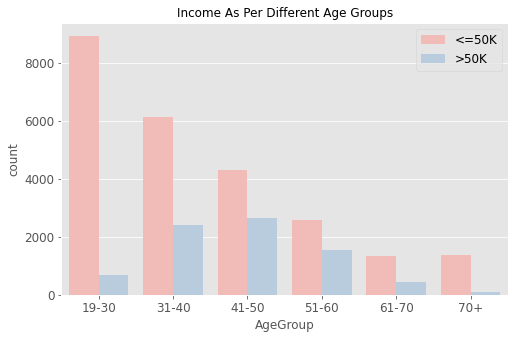

In [23]:
plt.figure(figsize=(8,5))
age_ol = ['19-30', '31-40', '41-50', '51-60', '61-70', '70+']
sns.countplot(census_df['AgeGroup'], hue = census_df['income'], palette='Pastel1', order = age_ol)
plt.title('Income As Per Different Age Groups', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [24]:
#census_df['age_group'] = pd.cut(census_df['age'], 20)
#plt.style.use('seaborn-ticks')
#fig = plt.figure(figsize=(20,5)) 
#plt.subplot(1, 2, 1)
#sns.countplot(y="age_bin", data=census_df)
#plt.subplot(1, 2, 2)
#sns.distplot(census_df[census_df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
#sns.distplot(census_df[census_df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

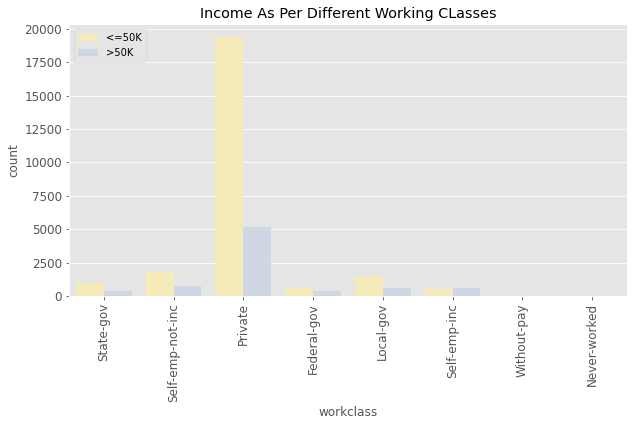

In [25]:
plt.figure(figsize=(10,5))
plt.title('Income As Per Different Working CLasses')
sns.countplot(census_df['workclass'], hue = census_df['income'], palette = 'Pastel2_r')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

Income level less than 50K is more than 3 times of those over 50K, showing that the the dataset is slightly biased.

In [26]:
census_df['education'].replace('Preschool', 'HS',inplace=True)
census_df['education'].replace('10th', 'HS',inplace=True)
census_df['education'].replace('11th', 'HS',inplace=True)
census_df['education'].replace('12th', 'HS',inplace=True)
census_df['education'].replace('1st-4th', 'HS',inplace=True)
census_df['education'].replace('5th-6th', 'HS',inplace=True)
census_df['education'].replace('7th-8th', 'HS',inplace=True)
census_df['education'].replace('9th', 'HS',inplace=True)

In [27]:
census_df[['education', 'education-num']].groupby(['education'],as_index=False).mean().sort_values(by='education-num')

,education,education-num
4,HS,5.602398
5,HS-grad,9.000000
8,Some-college,10.000000
1,Assoc-voc,11.000000
0,Assoc-acdm,12.000000
2,Bachelors,13.000000
6,Masters,14.000000
7,Prof-school,15.000000
3,Doctorate,16.000000


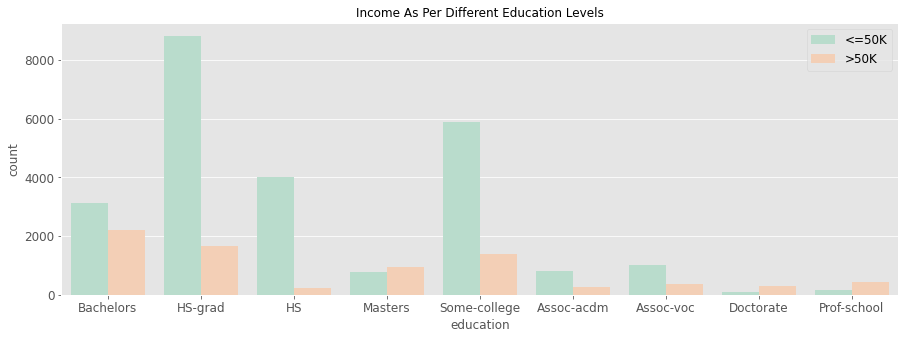

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(census_df['education'], hue = census_df['income'], palette='Pastel2')
plt.title('Income As Per Different Education Levels', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [29]:
census_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
census_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
census_df['marital-status'].replace(['Married-spouse-absent'], 'Married',inplace=True)

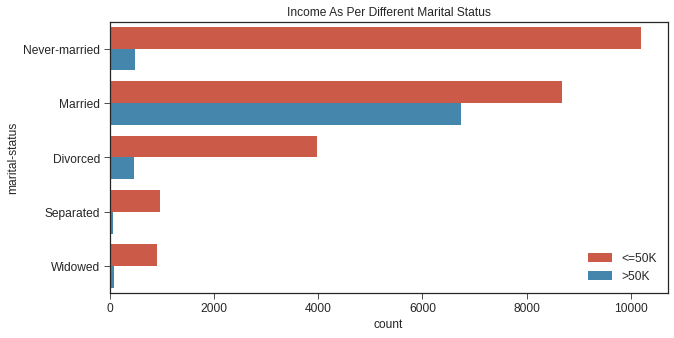

In [30]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-ticks')
sns.countplot(y='marital-status', hue = 'income', data = census_df)
plt.title('Income As Per Different Marital Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

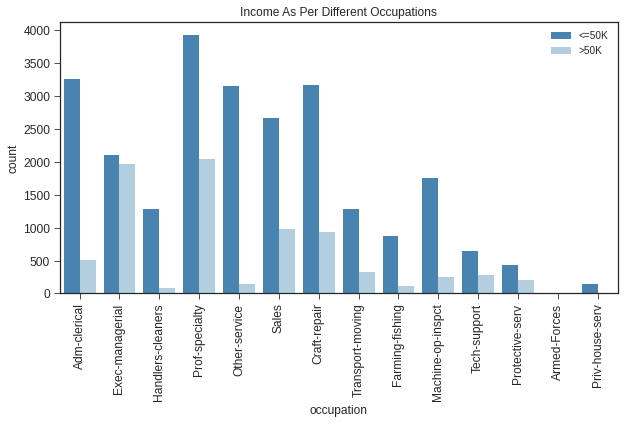

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['occupation'], hue = census_df['income'], palette='Blues_r')
plt.title('Income As Per Different Occupations', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)


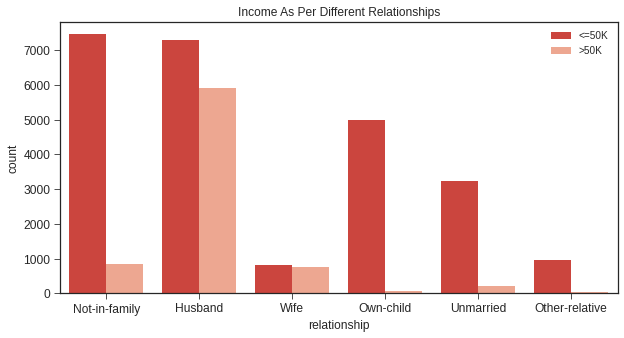

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['relationship'], hue = census_df['income'], palette='Reds_r')
plt.title('Income As Per Different Relationships', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

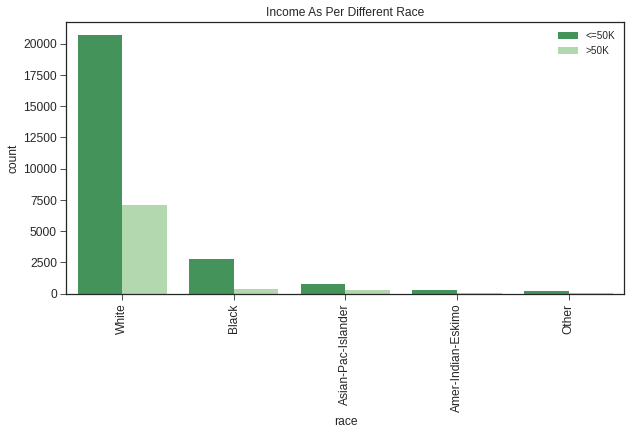

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(census_df['race'], hue = census_df['income'], palette='Greens_r')
plt.title('Income As Per Different Race', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

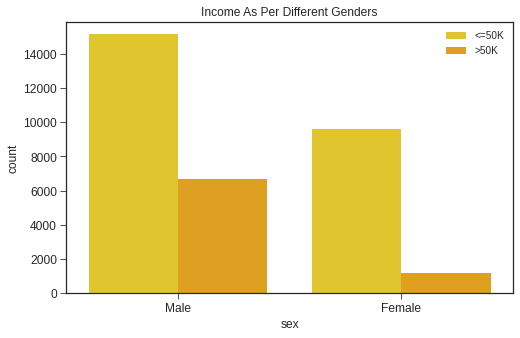

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(census_df['sex'], hue = census_df['income'], palette='Wistia')
plt.title('Income As Per Different Genders', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10)

In [35]:
census_df['hours-per-week_bin'] = pd.cut(census_df['hours-per-week'], 10)
census_df['hours-per-week'] = census_df['hours-per-week']

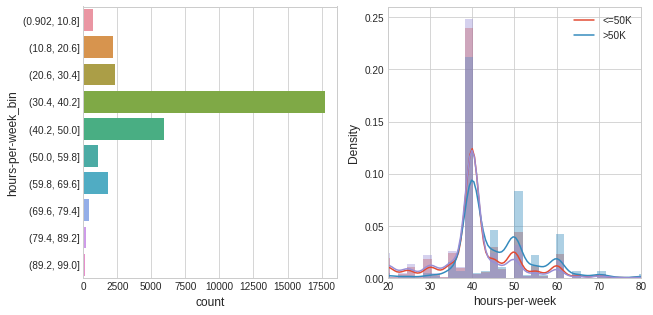

In [36]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=census_df);
plt.subplot(1, 2, 2)
sns.distplot(census_df['hours-per-week']);
sns.distplot(census_df[census_df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(census_df[census_df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 80)
plt.legend(loc='upper right', labels=['<=50K', '>50K'])

In [37]:
census_df['age-hours'] = census_df['age']*census_df['hours-per-week']
census_df['age-hours_bin'] = pd.cut(census_df['age-hours'], 10)

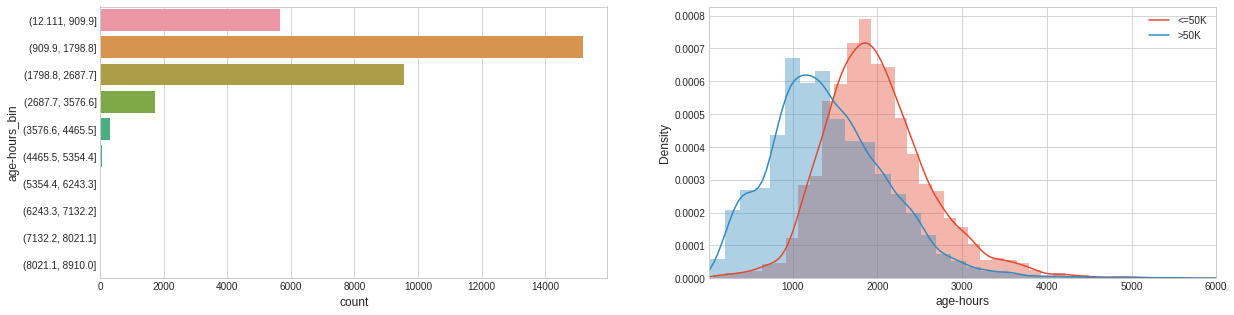

In [38]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=census_df)
plt.subplot(1, 2, 2)
sns.distplot(census_df[census_df['income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(census_df[census_df['income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(10, 6000)
plt.legend(loc='upper right', labels=['<=50K', '>50K'])

In [39]:
census_df['income']=census_df['income'].map({'<=50K': 0, '>50K': 1})

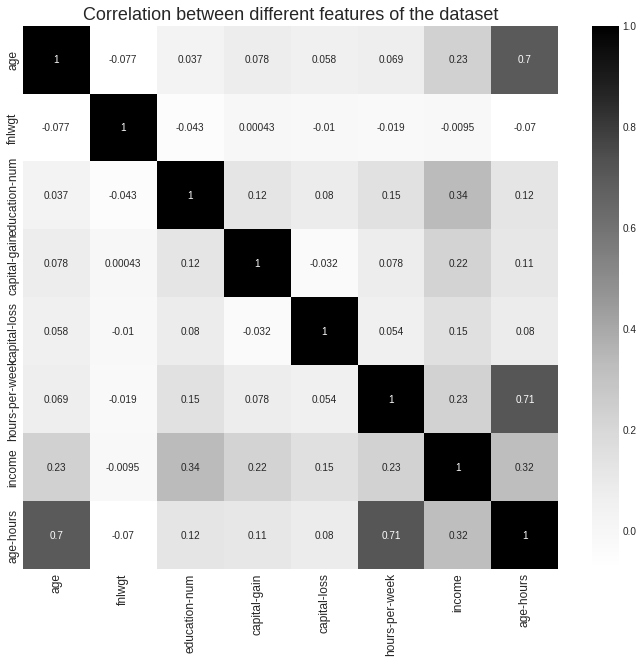

In [40]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18)
sns.heatmap(census_df.corr(), cmap = 'Greys', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [41]:
census_df.drop(['education-num'], axis = 1, inplace = True)
census_df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [42]:
census_df.drop('AgeGroup', inplace = True, axis = 1)
census_df.drop('hours-per-week_bin', inplace = True, axis = 1)
census_df.drop('age-hours', inplace = True, axis = 1)
census_df.drop('age-hours_bin', inplace = True, axis = 1)

In [43]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [44]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(census_df[col])
    census_df[col] = label_encoder.transform(census_df[col])
    
from sklearn.model_selection import train_test_split
x = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = census_df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [46]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

In [47]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [48]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [49]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [50]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [51]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):194.318510055542 seconds
Learning rate: 0.1
Iteration: 100000


In [52]:
result = sigmoid(x, theta)

In [53]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


24.080955744602438

In [54]:
start_time = time.time()
num_iter = 100000
x2 = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) 
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using MLE):183.19231510162354seconds
Learning rate: 0.1
Iteration: 100000


In [55]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


78.94720678111852

In [66]:
np.save('theta.npy', theta2)

In [57]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = census_df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8048930289691882


In [59]:
X = census_df[['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
Y = census_df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8088438507600184
2 0.8010133578995855
3 0.7999385843697221
4 0.8060801473975127
5 0.8019345923537541
6 0.8079226163058498
7 0.8025487486565331
8 0.8050053738676494
9 0.8099186242898818
10 0.7971748810072163
11 0.8076155381544603
12 0.8016275142023646
13 0.8048518347919545
14 0.8096115461384923
15 0.8046982957162598
16 0.8070013818516812
17 0.8008598188238907
18 0.8068478427759865
19 0.805926608321818
20 0.8014739751266697
21 0.8014739751266697
22 0.7996315062183326
23 0.7985567326884692
24 0.798710271764164


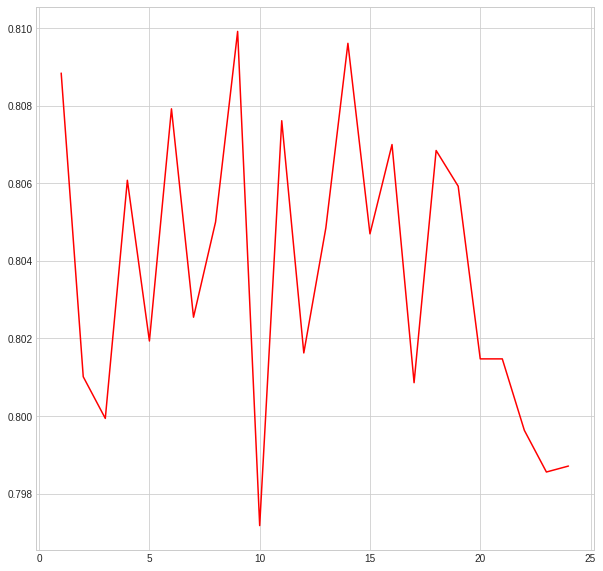

In [60]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [61]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8088438507600184
0.8099186242898818
0.8096115461384923


In [62]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   marital-status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   sex             32561 non-null  int64
 9   capital-gain    32561 non-null  int64
 10  capital-loss    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  native-country  32561 non-null  int64
 13  income          32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the test data
#test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)
test_data = pd.read_csv('adult.test.csv')
# Preprocess the test data
test_data = test_data.replace(' ?', np.nan)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)
test_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
test_data['income'] = test_data['income'].apply(lambda x: 1 if '>50K' in x else 0)
test_data.drop(['education-num'], axis = 1, inplace = True)
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(test_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

# Extract the features from the test data
X_test = test_data.values
# Load the learned theta parameters
theta = np.load('theta.npy')

# Make predictions on the test data
def predict(theta, X):
    # Compute the dot product between X and theta
    dot_product = np.dot(X, theta)
    
    # Apply the sigmoid function to the dot product
    y_pred = 1 / (1 + np.exp(-dot_product))
    
    # Round the predicted probabilities to 0 or 1
    y_pred_rounded = np.round(y_pred)
    
    return y_pred_rounded.astype(int)

y_pred = predict(theta, X_test)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(y_pred).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100


Accuracy (Maximum Likelihood Estimation):


74.9734395750332